In [ ]:
###IMPORTAÇÃO DE ARQUIVOS

import geopandas as gpd 

regiao  = gpd.read_file('dados/baciascriciuma.kml', driver="KML")
otto    = gpd.read_file('dados/ottobruto.gpkg', layer='geoft_bho_ach_otto_nivel_07')
bacias = gpd.sjoin(otto, regiao, predicate="intersects")

In [ ]:
### IMPORTAÇÃO DE MÓDULO
import matplotlib.pyplot as plt
import contextily as cx

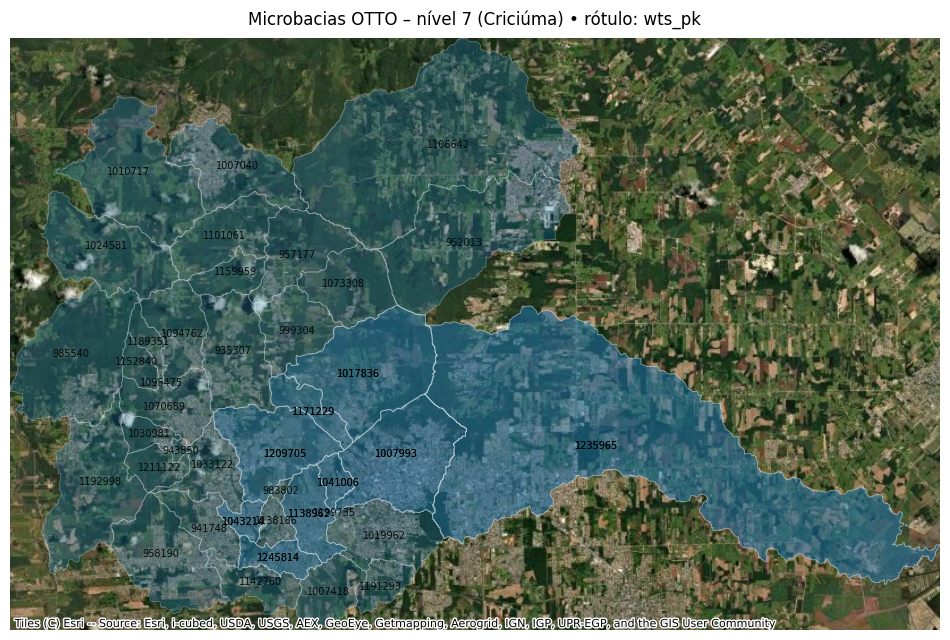

In [ ]:
### PLOTAGEM DO MAPA INICIAL


id_col = "wts_pk"
assert id_col in bacias.columns, f"Coluna {id_col} não existe em bacias!"

bacias_3857 = bacias.to_crs(3857).copy()

fig, ax = plt.subplots(figsize=(12, 10))
# polígonos base
bacias_3857.plot(ax=ax, alpha=0.30, edgecolor="white", linewidth=0.6)

# rótulos no ponto representativo (fica dentro do polígono)
for _, row in bacias_3857.iterrows():
    p = row.geometry.representative_point()
    ax.text(p.x, p.y, str(row[id_col]), fontsize=7, ha="center", va="center", alpha=0.9)

# garantir o enquadramento antes do basemap
xmin, ymin, xmax, ymax = bacias_3857.total_bounds
ax.set_xlim(xmin, xmax); ax.set_ylim(ymin, ymax)

cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery)
ax.set_axis_off()
ax.set_title("Microbacias OTTO – nível 7 (Criciúma) • rótulo: wts_pk", pad=10)
plt.show()


In [56]:
### EXPORTAÇÃO DO KML DAS MICROBACIAS
bacias.to_file("dados/microbacias.kml", driver="KML", layer="microbacias")
print("KML salvo em dado/microbacias.kml")

c:\Users\henri\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 'Bacia Criciúma Rural' of field microbacias.wts_gm_area parsed incompletely to real 0.
  ogr_write(
c:\Users\henri\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 'Bacia Criciúma Urbana' of field microbacias.wts_gm_area parsed incompletely to real 0.
  ogr_write(


KML salvo em dado/microbacias.kml


In [57]:
### IMPORTAÇÃO E SELEÇÃO DAS MICROBACIAS DE INTERESSE

selecao = gpd.read_file("dados/seleção.kml", driver="KML")
assert "Name" in selecao.columns, "Este KML não tem coluna 'Name'. Abra o arquivo e verifique."
sel_ids = selecao["Name"].astype(str).str.strip()
print(f"{len(sel_ids)} IDs lidos da seleção.")

bacias_ids = bacias[id_col].astype(str).str.strip()
mask = bacias_ids.isin(set(sel_ids))
bacias_sel = bacias.loc[mask].copy()
print(f"Microbacias selecionadas: {bacias_sel.shape[0]} de {bacias.shape[0]}")

36 IDs lidos da seleção.
Microbacias selecionadas: 36 de 49


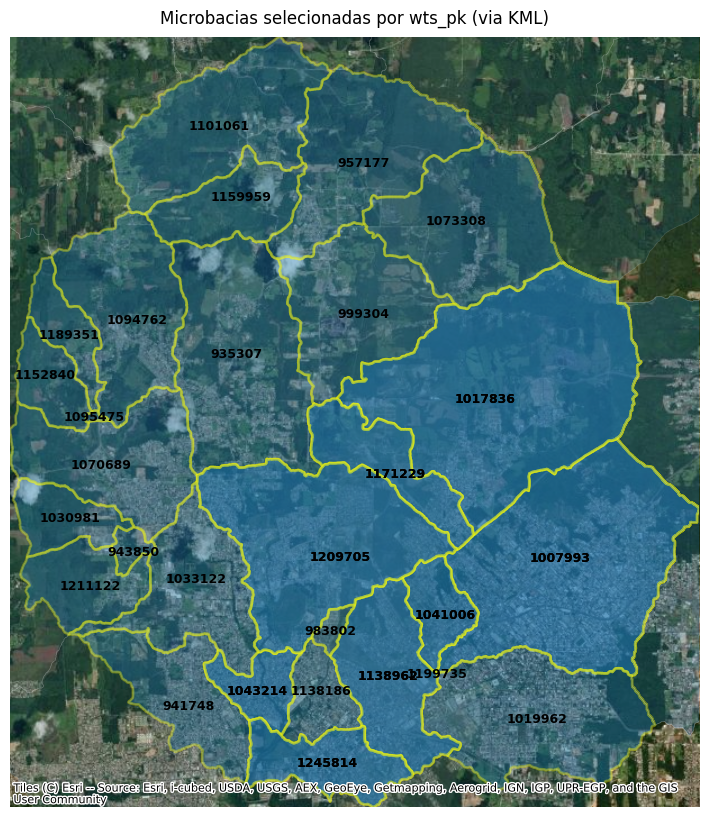

In [ ]:
### MAPA DE MICROBACIAS DE INTERESSE

b_all = bacias.to_crs(3857)
b_hit = bacias_sel.to_crs(3857)

fig, ax = plt.subplots(figsize=(12, 10))
# fundo: todas (claras)
b_all.plot(ax=ax, alpha=0.15, edgecolor="white", linewidth=0.5)
# destaque: só as selecionadas
b_hit.plot(ax=ax, alpha=0.35, edgecolor="yellow", linewidth=2.0)

# rótulos só nas selecionadas, pra ficar legível
for _, row in b_hit.iterrows():
    p = row.geometry.representative_point()
    ax.text(p.x, p.y, str(row[id_col]), fontsize=9, weight="bold", ha="center", va="center")

xmin, ymin, xmax, ymax = b_hit.total_bounds
ax.set_xlim(xmin, xmax); ax.set_ylim(ymin, ymax)
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery)
ax.set_axis_off()
ax.set_title("Microbacias selecionadas por wts_pk (via KML)", pad=10)
plt.show()
